<a href="https://colab.research.google.com/github/okanbuyuktepe/NLP-in-Tensorflow/blob/master/multiple_layer_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Layer LSTM

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete5XR1OD/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete5XR1OD/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete5XR1OD/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Pot

In [4]:
tokenizer = info.features['text'].encoder

In [5]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BATCH_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset  = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [6]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
NUM_EPOCSH = 10
history = model.fit(train_dataset, batch_size= BATCH_SIZE, epochs=NUM_EPOCSH, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 1831s 5s/step - loss: 0.5536 - accuracy: 0.7216 - val_loss: 0.5461 - val_accuracy: 0.7254
Epoch 2/10
391/391 [==============================] - 1859s 5s/step - loss: 0.4457 - accuracy: 0.8020 - val_loss: 0.4680 - val_accuracy: 0.7794
Epoch 3/10
391/391 [==============================] - 1864s 5s/step - loss: 0.4097 - accuracy: 0.8268 - val_loss: 0.4289 - val_accuracy: 0.8085
Epoch 4/10
391/391 [==============================] - 1857s 5s/step - loss: 0.3236 - accuracy: 0.8675 - val_loss: 0.4953 - val_accuracy: 0.7639
Epoch 5/10
391/391 [==============================] - 1871s 5s/step - loss: 0.4557 - accuracy: 0.7890 - val_loss: 0.5680 - val_accuracy: 0.7332
Epoch 6/10
391/391 [==============================] - 1883s 5s/step - loss: 0.3335 - accuracy: 0.8660 - val_loss: 0.3790 - val_accuracy: 0.8355
Epoch 7/10
391/391 [==============================] - 1892s 5s/step - loss: 0.2206 - accuracy: 0.9186 - val_loss: 0.3576 - val_accuracy:

In [10]:
import matplotlib.pyplot as plt

In [11]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string , 'val_'+string])
  plt.show()

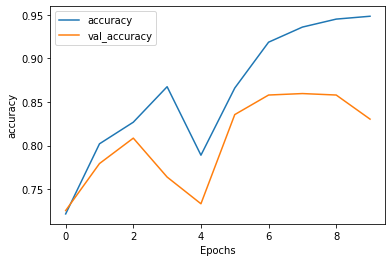

In [12]:
plot_graphs(history, 'accuracy')

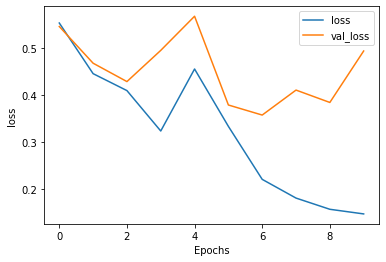

In [14]:
plot_graphs(history, 'loss')